In [1]:
import sys
# import pyccl as ccl
import pickle
import camb
sys.path.insert(0,'../skylens')
from importlib import reload
from astropy.cosmology import Planck15 as cosmo
from astropy.cosmology import default_cosmology
from astropy import units
import astropy
import time

import psutil
from distributed.utils import format_bytes

#only for python3
import importlib
reload=importlib.reload

In [2]:
%matplotlib inline
import matplotlib
# matplotlib.use('SVG')   # generate postscript output by default

# from matplotlib import rc
# rc('text', usetex=False) 

In [3]:
10000*3600/1.e6

36.0

In [5]:
from skylens import *
# from fisher import *
from skylens.PCA_shear import *

In [6]:
# import survey_utils
# reload(survey_utils)
from skylens.survey_utils import *

In [7]:
fig_home='./figures/'
fig_format='pdf'

In [8]:
log(5000)/log(1000)

1.2329900014453397

In [9]:
fname='/verafs/scratch/phy200040p/sukhdeep/physics2/skylens/tests/fisher/cl_cov_win_win32_binnedL_5_1_5_17_nlb12_lmax1000_z0.1-3.5_zlmax1.5_bary0_AT150.pkl'
# fname2='/verafs/scratch/phy200040p/sukhdeep/physics2/skylens/tests/fisher//cl_cov_win_5_1_5_17_nlb12_lmax1000_z0.1-3.5_zlmax1.5_bary0_AT150.pkl'
# fname3='/verafs/scratch/phy200040p/sukhdeep/physics2/skylens/tests/fisher//cl_cov_5_1_5_17_nlb12_lmax1000_z0.1-3.5_zlmax1.5_bary0_AT150.pkl'
# fname='../tests/fisher/fisher_2_2_4_nlb10_lmax1000_z0.1-3.5_bary0.pkl'
with open(fname,'rb') as of:
    cov_cl=pickle.load(of)
# with open(fname2,'rb') as of:
#     cov_cl2=pickle.load(of)
# with open(fname3,'rb') as of:
#     cov_cl3=pickle.load(of)

In [10]:
cov_cl['z_bins'].keys()

dict_keys(['zmin', 'zmax', 'nsource', 'ns_bins', 'nside', 'n_lens_bins', 'n_lensD_bins', 'use_window', 'nlens', 'nDlens', 'area_overlap', 'f_sky', 'z_lens_sigma', 'mag_fact', 'l0', 'l_bins', 'l', 'z_source_sigma', 'zs_bins', 'zl_bins', 'zlD_bins', 'zs_bins_train', 'zs_bins_missed', 'corr_indxs', 'kernel_product'])

In [13]:
cov_cl['z_bins']['zs_bins']['n_bins']+cov_cl['z_bins']['zs_bins_train']['n_bins']

10

In [12]:
cov_cl['z_bins']['zl_bins']['n_bins']+cov_cl['z_bins']['zlD_bins']['n_bins']

22

In [11]:
cc=cov_cl['cl_L']['cov'].todense()

In [12]:
error=np.sqrt(np.diag(cc))
corr=cc/np.outer(error,error)

In [18]:
error.shape[0]/11

364.0

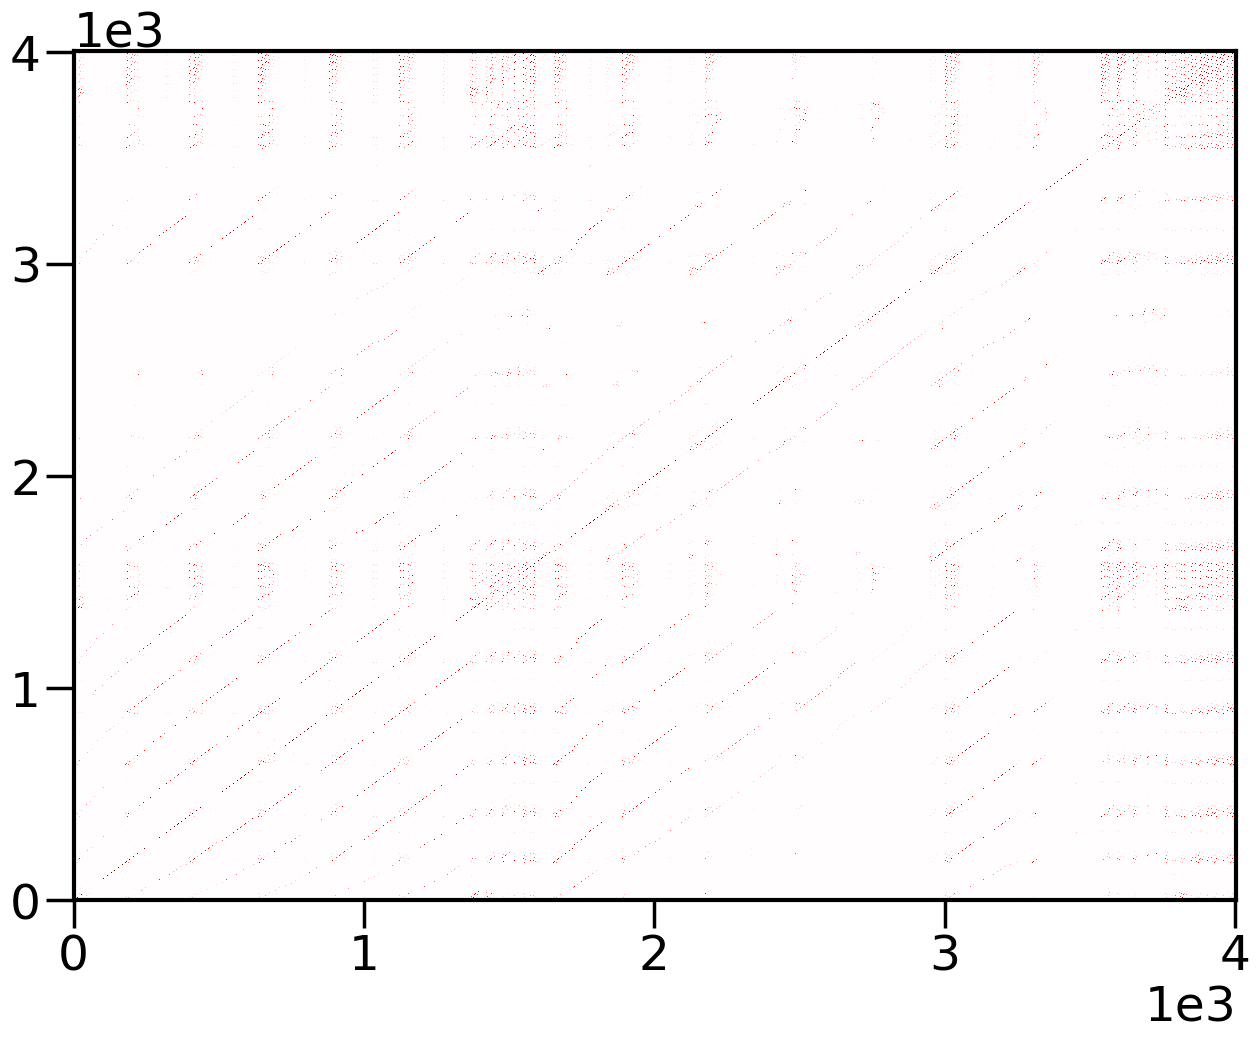

In [13]:
pcolor(corr,vmin=-1,vmax=1,cmap='seismic')
show()

In [31]:
nst=32
mm=np.random.uniform(size=hp.nside2npix(nst))
%time cc=hp.anafast(mm)

CPU times: user 426 ms, sys: 21.1 ms, total: 448 ms
Wall time: 8.41 ms


In [86]:
fname='/verafs/scratch/phy200040p/sukhdeep/physics2/skylens/tests/fisher/cl_cov_win_binned_2_1_2_4_nlb12_lmax1000_z0.1-3.5_zlmax1.5_bary0_AT150.pkl'
fname2='/verafs/scratch/phy200040p/sukhdeep/physics2/skylens/tests/fisher/cl_cov_win_2_1_2_4_nlb12_lmax1000_z0.1-3.5_zlmax1.5_bary0_AT150.pkl'
fname3='/verafs/scratch/phy200040p/sukhdeep/physics2/skylens/tests/fisher/cl_cov_2_1_2_4_nlb12_lmax1000_z0.1-3.5_zlmax1.5_bary0_AT150.pkl'
# fname='../tests/fisher/fisher_2_2_4_nlb10_lmax1000_z0.1-3.5_bary0.pkl'
with open(fname,'rb') as of:
    cov_cl=pickle.load(of)
with open(fname2,'rb') as of:
    cov_cl2=pickle.load(of)
with open(fname3,'rb') as of:
    cov_cl3=pickle.load(of)

In [87]:
corr_ggl=('galaxy','shear')
corr_gg=('galaxy','galaxy')
corr_ll=('shear','shear')

In [88]:
fname='/verafs/scratch/phy200040p/sukhdeep/physics2/skylens/tests/fisher/win_binned_2_1_2_4_nlb12_lmax1000_z0.1-3.5_zlmax1.5_bary0_AT150.pkl'
fname2='/verafs/scratch/phy200040p/sukhdeep/physics2/skylens/tests/fisher/win_2_1_2_4_nlb12_lmax1000_z0.1-3.5_zlmax1.5_bary0_AT150.pkl'
with open(fname,'rb') as of:
    win=pickle.load(of)
with open(fname2,'rb') as of:
    win2=pickle.load(of)

In [89]:
cov_cl2['z_bins']['f_sky'][corr_gg][(0,0)]

0.2999674479166667

In [90]:
win['full']['cl'][corr_gg][0,0].keys()

dict_keys(['corr', 'indxs', 12, 'binning_util', 'bin_wt', 'W_pm', 's1s2', 'M', 'M_noise'])

In [114]:
l0=np.arange(50,1000)
l_bins=np.int64(np.logspace(np.log10(50),np.log10(1000),12))
lb=0.5*(l_bins[1:]+l_bins[:-1])
dl=l_bins[1:]-l_bins[:-1]
b_norm=1./(dl/lb)/.3

In [ ]:
b_norm

[]

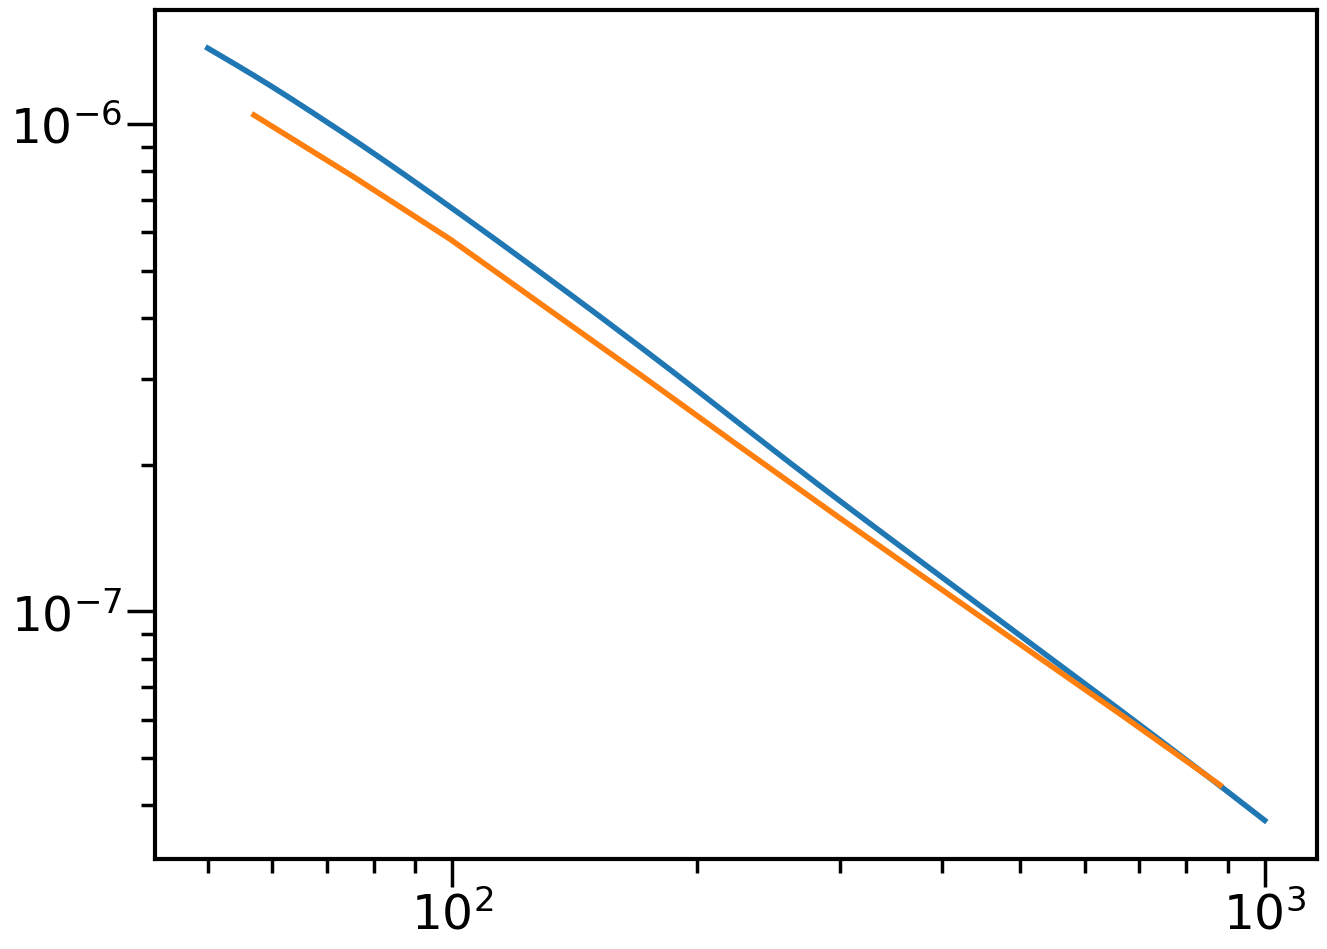

In [101]:
plot(l0,win['full']['cl'][corr_gg][0,0]['bin_wt']['wt0'])
plot(lb,1./win['full']['cl'][corr_gg][0,0]['bin_wt']['wt_b'])
loglog()

[]

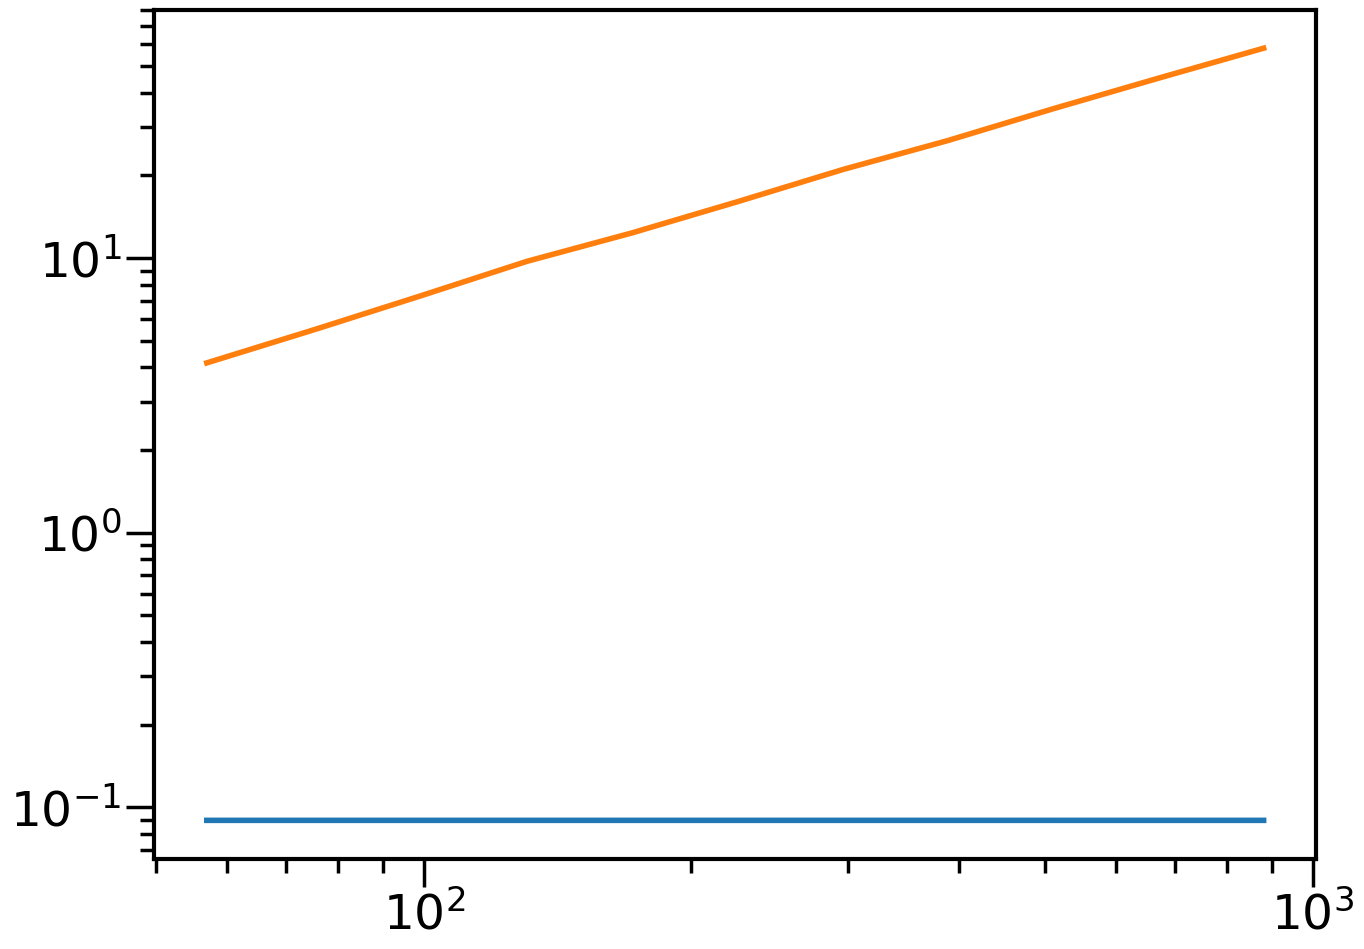

In [104]:
plot(lb,np.diag(win2['full']['cl'][corr_gg][0,0]['M']))
plot(lb,np.diag(win['full']['cl'][corr_gg][0,0]['M']))
loglog()

In [92]:
cov_cl3['cl_L']['pcl_b'].shape,cov_cl2['cl_L']['pcl_b'].shape,cov_cl['cl_L']['pcl_b'].shape

((748,), (748,), (748,))

In [110]:
b_norm

array([1.06875   , 1.07857143, 1.10555556, 1.11857143, 1.09468085,
       1.10901639, 1.11      , 1.11      , 1.10179856, 1.11132597,
       1.10523013])

In [ ]:
plot(lb,cov_cl['cl_L']['pcl_b'][0:11])
plot(lb,cov_cl3['cl_L']['pcl_b'][0:11])
plot(lb,cov_cl2['cl_L']['pcl_b'][0:11]*b_norm,'--')
loglog()

In [ ]:
cov_cl3['cl_L']['pcl_b']/cov_cl['cl_L']['pcl_b']

In [53]:
np.pi/.3

10.471975511965978

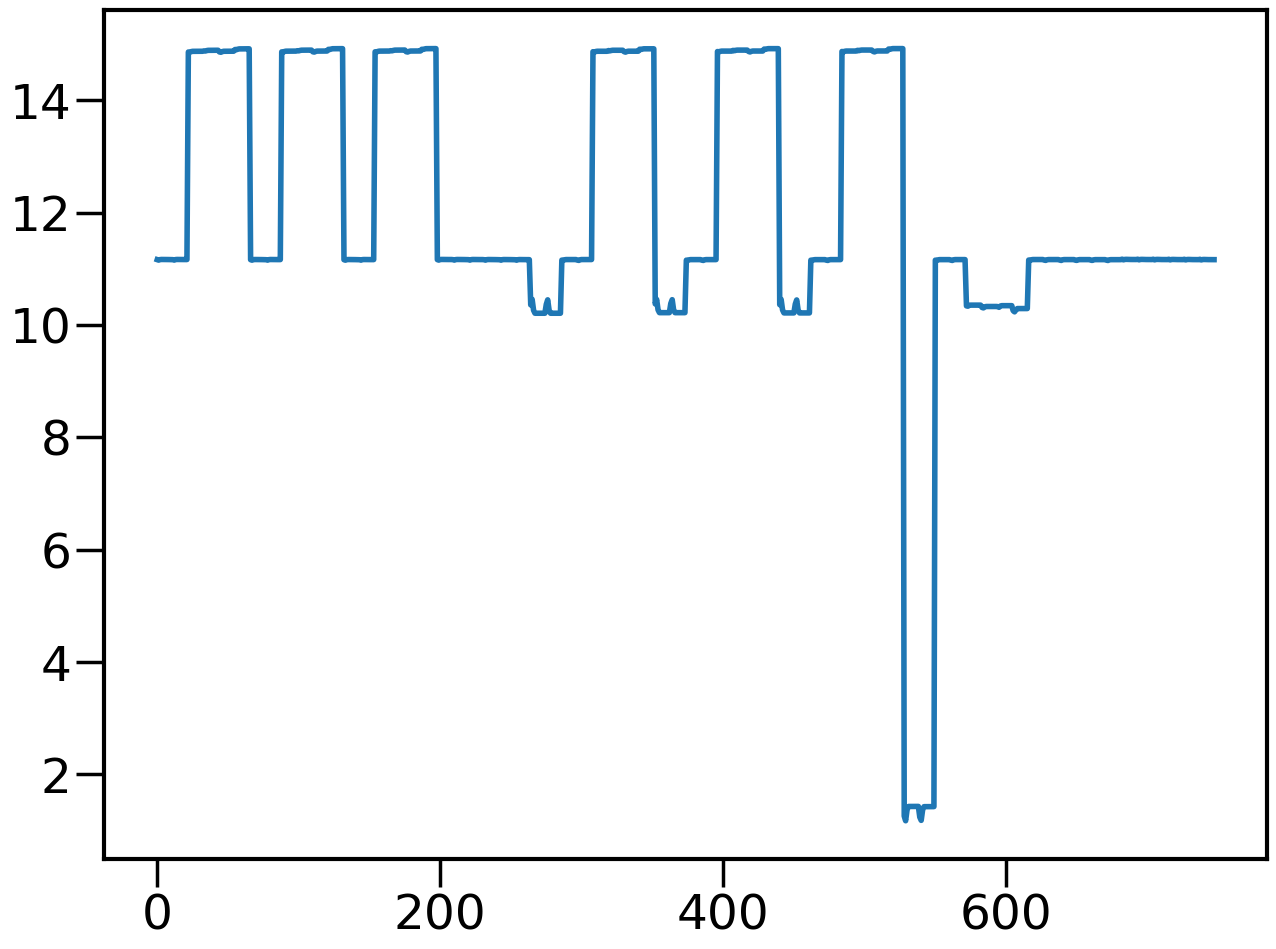

In [81]:
# plot(cov_cl['cl_L']['pcl_b'][0:12])
plot(cov_cl3['cl_L']['pcl_b']/cov_cl2['cl_L']['pcl_b'])
# loglog()

In [82]:
cov_cl['cl_L']['pcl_b'].shape

(748,)

In [9]:
fname='../tests/fisher/fisher_5_5_17_nlb10_lmax1000_z0.1-3.5_bary0.pkl'
# fname='../tests/fisher/fisher_2_2_4_nlb10_lmax1000_z0.1-3.5_bary0.pkl'
with open(fname,'rb') as of:
    fishes=pickle.load(of)

In [10]:
fishes.keys()

dict_keys(['priors', 'f0', 'f_nz0', 'f_all', 'f_nz_all', 'f_all_lsst', 'f_nz_all_lsst', 'cov_file', 'cosmo_fid'])

In [11]:
f_nz_all_lsst=fishes['f_nz_all_lsst']
f_nz0=fishes['f_nz0']
f_nz_all=fishes['f_nz_all']


In [12]:
import plot_fisher_tool
reload(plot_fisher_tool)
from plot_fisher_tool import *

In [13]:
f_nz_all_lsst['params'].shape

(234,)

In [14]:
f_nz_all.keys()

dict_keys(['cov_p_inv', 'params_all', 'prior', 'cov_p', 'error', 'cov_deriv', 'model_deriv', 'cov', 'cov_inv', 'model', 'x_vars', 'params'])

In [15]:
x=np.isfinite(f_nz_all['cov'])
x.mean()

1.0

In [16]:
fishes.keys()

dict_keys(['priors', 'f0', 'f_nz0', 'f_all', 'f_nz_all', 'f_all_lsst', 'f_nz_all_lsst', 'cov_file', 'cosmo_fid'])

In [17]:
f_nz_all['x_vars']['Om']

array([0.304425, 0.310575])

In [18]:
f_nz_all['model']['Om'][0]

array([5.78605702e-08, 3.77346379e-08, 2.47200526e-08, ...,
       3.23024982e-09, 2.10622242e-09, 1.39526640e-09])

In [19]:
error=np.sqrt(np.diag(f_nz_all['cov']))
corr=f_nz_all['cov']/np.outer(error,error)

In [20]:
np.linalg.det(f_nz_all['cov_p_inv'])

-0.0

In [35]:
err=np.sqrt(np.diag(f_nz_all['cov_p']))
corr=f_nz_all['cov_p']/np.outer(err,err)

<ipython-input-35-d8a1feb6eca5>:1: RuntimeWarning: invalid value encountered in sqrt
  err=np.sqrt(np.diag(f_nz_all['cov_p']))


(1.0, 251.0)

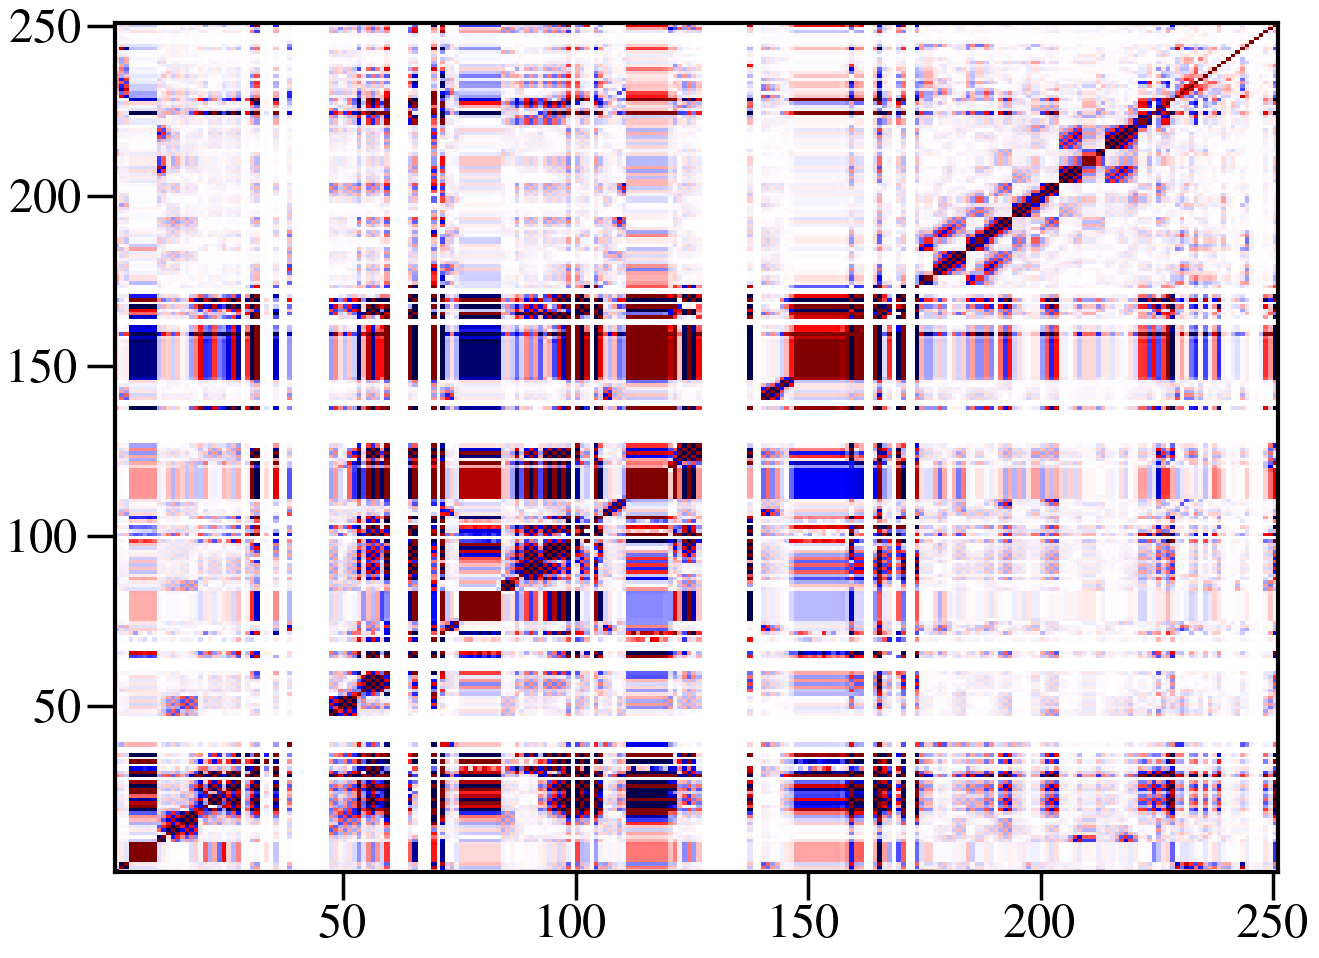

In [37]:
pcolor(corr,cmap='seismic',vmin=-1,vmax=1)
# loglog()
xlim(1,len(f_nz_all['cov_p']))
ylim(1,len(f_nz_all['cov_p']))

In [24]:
dd=np.diag(f_nz_all['cov_p_inv'])
x=np.isclose(dd,0)
f_nz_all['params'][x], x.sum()

(array([], dtype='<U32'), 0)

(200.0, 300.0)

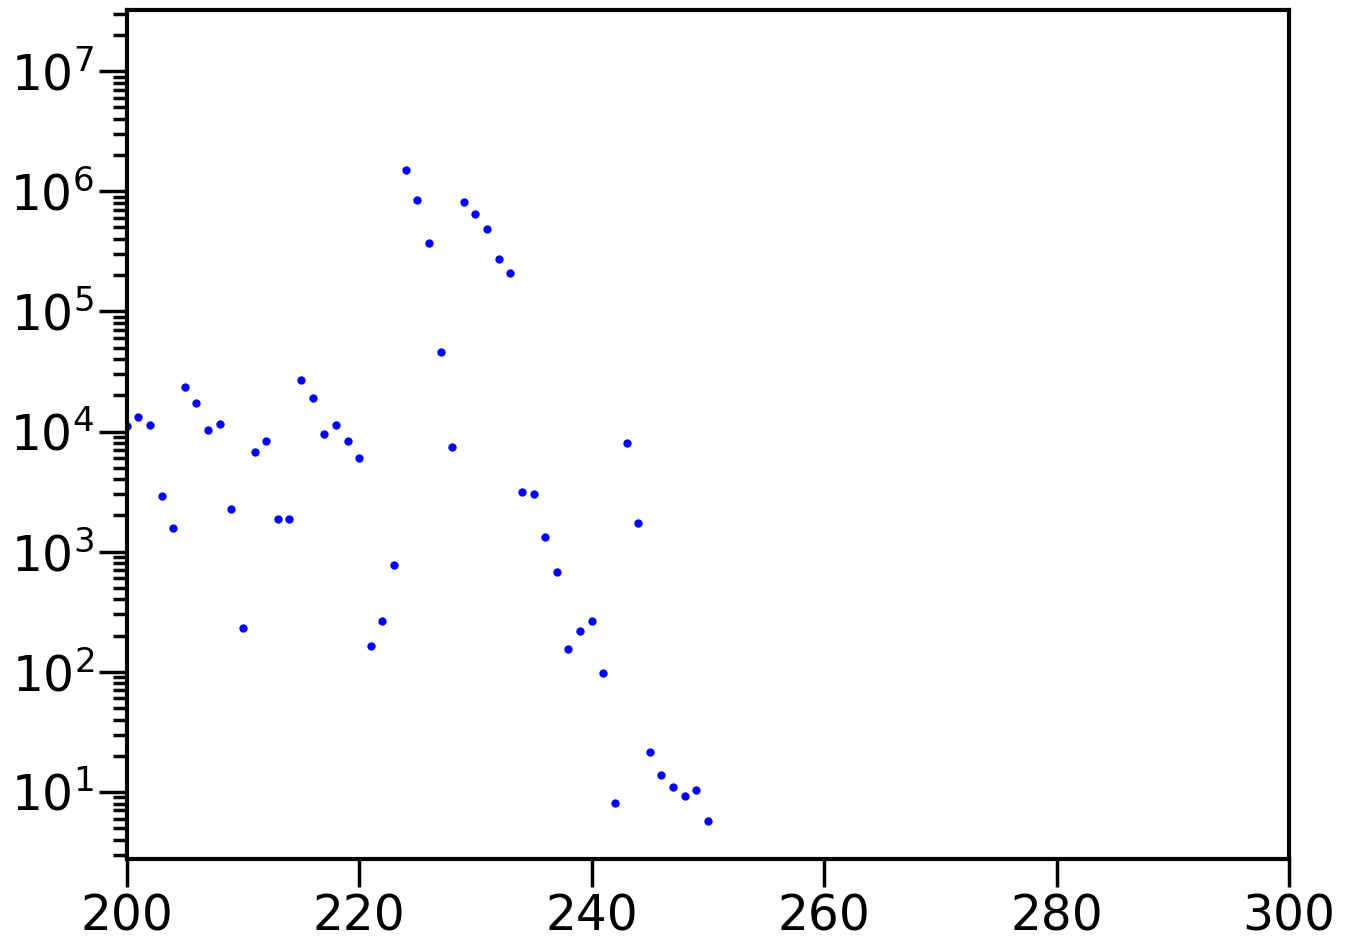

In [25]:
plot(dd,'b.')
# loglog()
yscale('log')
xlim(200,300)

In [26]:
f_nz_all.keys()

dict_keys(['cov_p_inv', 'params_all', 'prior', 'cov_p', 'error', 'cov_deriv', 'model_deriv', 'cov', 'cov_inv', 'model', 'x_vars', 'params'])

(1.0, 1.5)

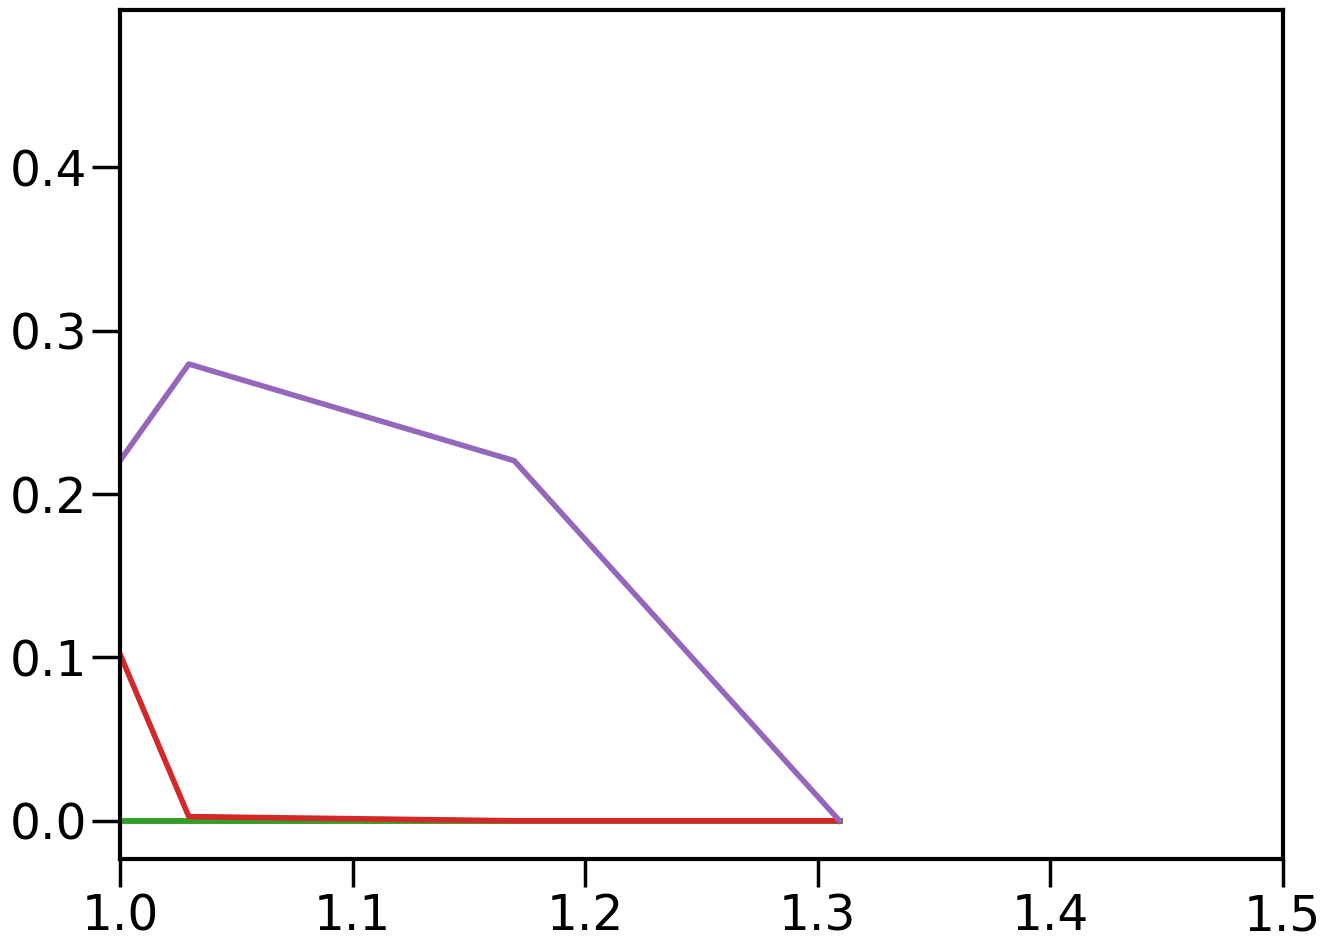

In [27]:
zb=cov_cl['z_bins']
for i in np.arange(5):
# plot(z_bins_kwargs['zs_bins'][i]['z'],pp_s[i],'--')
    plot(zb['zl_bins'][i]['z'],zb['zl_bins'][i]['nz'])
#     fill_between(zb['zl_bins'][i]['z'],zb['zl_bins'][i]['nz']-pp_l[i],zb['zl_bins'][i]['nz']+pp_l[i],alpha=0.2)
# yscale('log')
# xscale('log')
xlim(1,1.5)

../skylens/plot_fisher_tool.py:74: RuntimeWarning: invalid value encountered in sqrt
  self.par_sigma1D[i] = np.sqrt(np.diag(self.Cov_par[i]))
../skylens/plot_fisher_tool.py:81: RuntimeWarning: invalid value encountered in sqrt
  self.Corr_par[i]=self.Cov_par[i]/np.sqrt(np.outer(diag,diag))
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


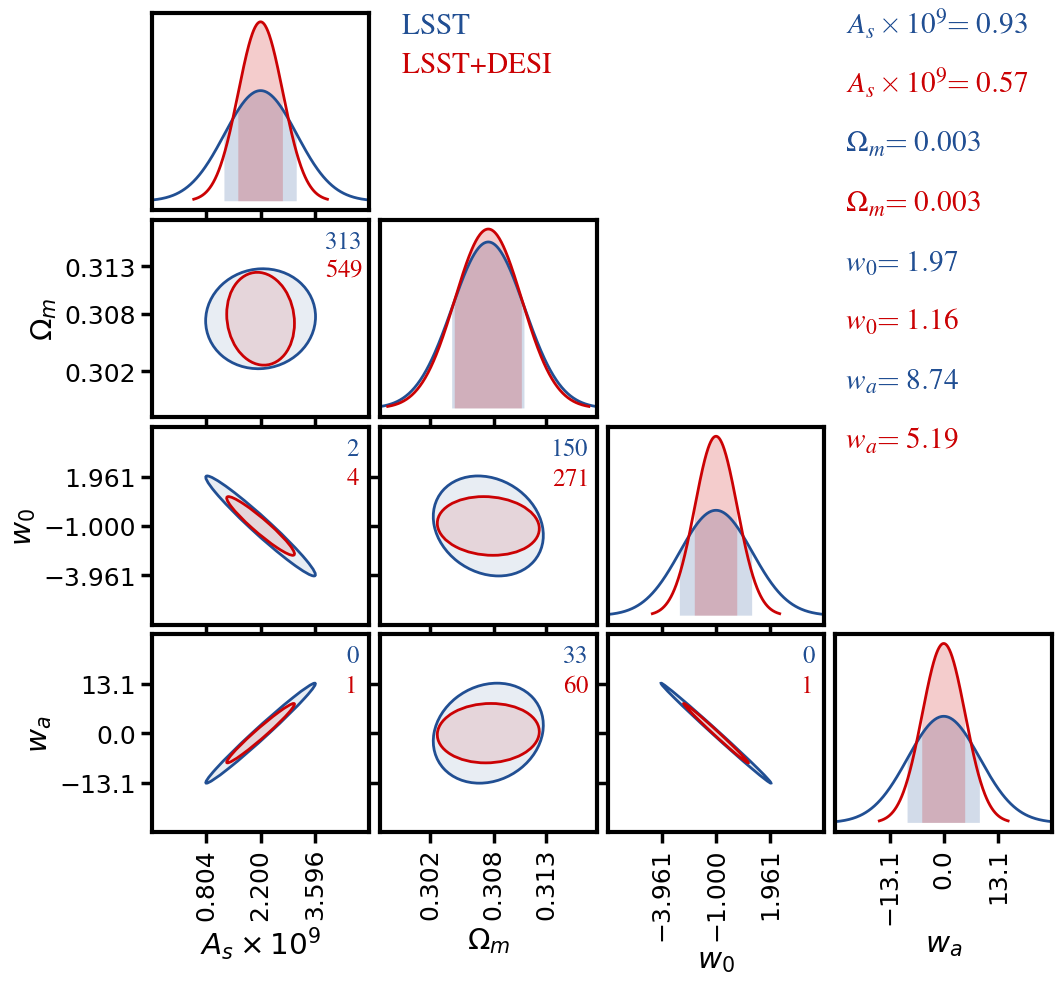

In [28]:
fish1 = fisher_tool(Fishers={0:f_nz_all_lsst['cov_p_inv'],1:f_nz_all['cov_p_inv']},
                    pars={0:f_nz_all_lsst['params'],1:f_nz_all['params']},
                    par_cen=cosmo_fid#{'Om':0.28374511,'Ase9':0.80351633}
                    ,fisher_titles={0:'LSST',1:'LSST+DESI'})
f=fish1.plot_fish(pars=['Ase9','Om','w','wa'])

../skylens/plot_fisher_tool.py:81: RuntimeWarning: divide by zero encountered in true_divide
  self.Corr_par[i]=self.Cov_par[i]/np.sqrt(np.outer(diag,diag))
../skylens/plot_fisher_tool.py:81: RuntimeWarning: invalid value encountered in true_divide
  self.Corr_par[i]=self.Cov_par[i]/np.sqrt(np.outer(diag,diag))


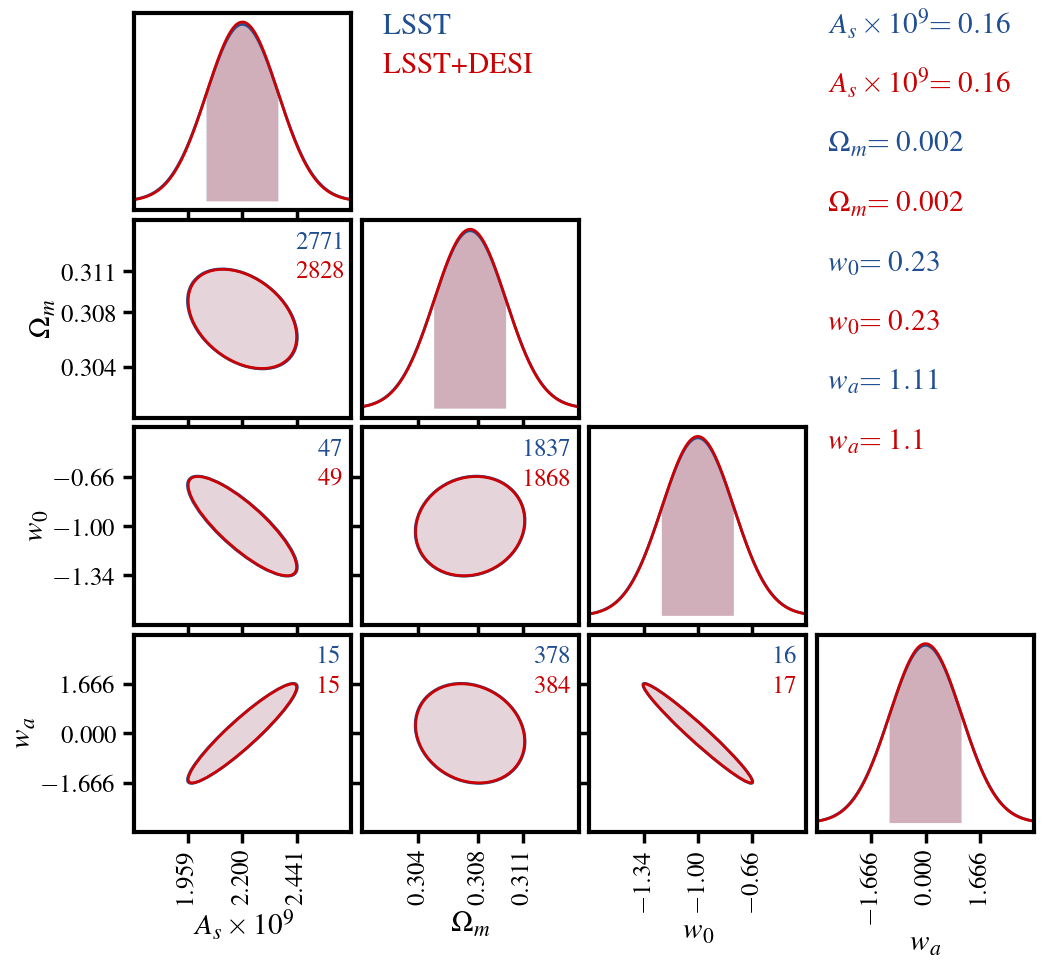

In [29]:
fish1 = fisher_tool(Fishers={0:f_nz_all_lsst['prior']['cov_p_inv'],1:f_nz_all['prior']['cov_p_inv']},
                    pars={0:f_nz_all_lsst['params'],1:f_nz_all['params']},
                    par_cen=cosmo_fid#{'Om':0.28374511,'Ase9':0.80351633}
                    ,fisher_titles={0:'LSST',1:'LSST+DESI'})
f=fish1.plot_fish(pars=['Ase9','Om','w','wa'])

../skylens/plot_fisher_tool.py:74: RuntimeWarning: invalid value encountered in sqrt
  self.par_sigma1D[i] = np.sqrt(np.diag(self.Cov_par[i]))
../skylens/plot_fisher_tool.py:81: RuntimeWarning: invalid value encountered in sqrt
  self.Corr_par[i]=self.Cov_par[i]/np.sqrt(np.outer(diag,diag))
../skylens/plot_fisher_tool.py:81: RuntimeWarning: divide by zero encountered in true_divide
  self.Corr_par[i]=self.Cov_par[i]/np.sqrt(np.outer(diag,diag))
../skylens/plot_fisher_tool.py:81: RuntimeWarning: invalid value encountered in true_divide
  self.Corr_par[i]=self.Cov_par[i]/np.sqrt(np.outer(diag,diag))


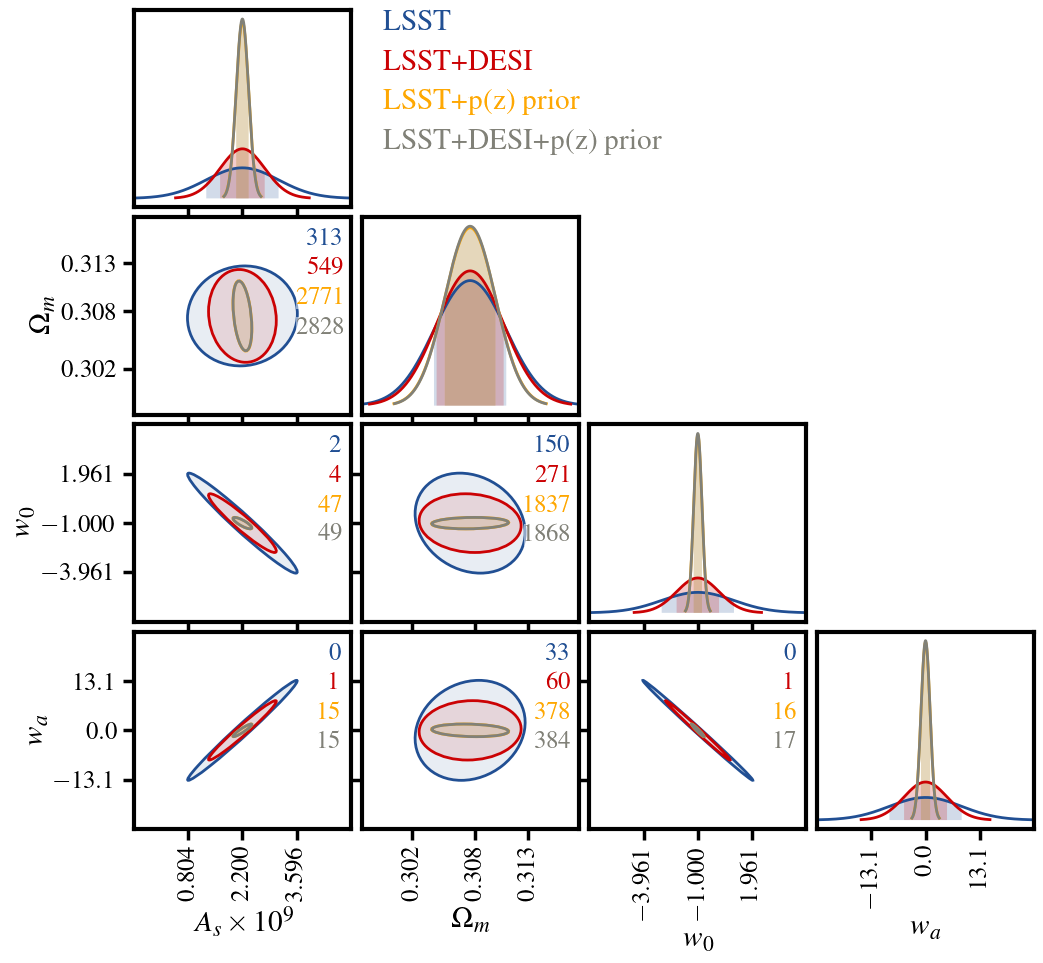

In [30]:
fish1 = fisher_tool(Fishers={0:f_nz_all_lsst['cov_p_inv'],1:f_nz_all['cov_p_inv'],
                            2:f_nz_all_lsst['prior']['cov_p_inv'],3:f_nz_all['prior']['cov_p_inv']},
                    pars={0:f_nz_all_lsst['params'],1:f_nz_all['params'],
                         2:f_nz_all_lsst['params'],3:f_nz_all['params']},
                    par_cen=cosmo_fid#{'Om':0.28374511,'Ase9':0.80351633}
                    ,fisher_titles={0:'LSST',1:'LSST+DESI',
                                   2:'LSST+p(z) prior',3:'LSST+DESI+p(z) prior'},
                   print_par_error=False)
f=fish1.plot_fish(pars=['Ase9','Om','w','wa'])

In [31]:
f_nz_all_lsst['model_deriv']['nz_s_0_17']

array([ 2.89356143e-08,  1.98293535e-08,  1.29739352e-08,  8.40161391e-09,
        5.35789695e-09,  3.46254255e-09,  2.30990158e-09,  1.61019029e-09,
        1.15826507e-09,  3.13026266e-08,  2.38281691e-08,  1.70742046e-08,
        1.09630169e-08,  7.18275407e-09,  4.52036581e-09,  2.85504705e-09,
        1.82753767e-09,  1.20972161e-09,  1.86987032e-08,  1.40063224e-08,
        1.08326241e-08,  7.92076224e-09,  4.94800877e-09,  3.28074318e-09,
        2.02640842e-09,  1.24688536e-09,  7.69372747e-10,  1.00277854e-08,
        7.93766702e-09,  5.91122814e-09,  4.63704379e-09,  3.17235372e-09,
        2.01693006e-09,  1.25870389e-09,  7.79719055e-10,  4.69935488e-10,
        2.54786652e-09,  2.15841241e-09,  1.63382316e-09,  1.23663194e-09,
        9.55891322e-10,  5.80827876e-10,  3.95397891e-10,  2.35071168e-10,
        1.40042540e-10,  3.20516704e-08,  2.09450038e-08,  1.37367142e-08,
        8.85748165e-09,  5.89694483e-09,  4.06976345e-09,  2.90500376e-09,
        2.10158081e-09,  